# ฐานข้อมูล PostgreSQL และ PostGIS

**ต้องมีการติดตั้งไลบรารีก่อนรัน**


In [179]:
# การกำหนดค่าพารามิเตอร์ในการเข้าถึงฐานข้อมูล
host = "localhost"
database = "SpatialThailand"
user = "postgres"
password = "postgres"

In [180]:
#ข้อความที่ใช้ระบุค่าพารามิเตอร์ของการเชื่อมต่อไปยังฐานข้อมูลต่าง ๆ 
connection_string = f"postgresql://{user}:{password}@{host}/{database}"

## การใช้ไลบรารี sqlalchemy

In [195]:
# การนำเข้าไลบรารี sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import inspect
import pandas as pd

In [196]:
# การเชื่อมต่อไปยังฐานข้อมูล
engine = create_engine(connection_string)

In [197]:
# การเรียกดูตารางทั้งหมดในฐานข้อมูล
insp = inspect(engine)
insp.get_table_names()

['spatial_ref_sys',
 'tha_adm1',
 'hospital',
 'tha_adm2',
 'chumphon_surat',
 'tha_adm3',
 'cs_road',
 'covid']

In [198]:
# การคิวรี่ข้อมูลทั้งหมดจากตาราง covid
df = pd.read_sql('SELECT * from covid', engine)

In [199]:
df

,id,latitude,longitude,province,male,female,deaths,cases,geom
0,1,13.57030,100.2120,Samut Sakhon,28,42,0,2871,0101000020E610000021B07268910D59404ED1915CFE23...
1,2,13.77180,100.6240,Bangkok Metropolis,1262,1044,25,2431,0101000020E61000000E2DB29DEF275940091B9E5E298B...
2,3,13.19150,101.2020,Chon Buri,275,322,3,913,0101000020E6100000B0726891ED4C5940355EBA490C62...
3,4,13.59650,100.7100,Samut Prakan,181,135,4,379,0101000020E61000003D0AD7A3702D5940C520B0726831...
4,5,12.85430,101.4280,Rayong,10,28,0,342,0101000020E610000008AC1C5A645B594013F241CF66B5...
5,6,13.92420,100.3930,Nonthaburi,122,94,1,280,0101000020E6100000FED478E92619594029ED0DBE30D9...
6,7,7.96523,98.3463,Phuket,99,132,3,231,0101000020E6100000B5A679C729965840EA78CC4065DC...
7,8,6.93439,100.5450,Songkhla,93,43,0,136,0101000020E61000007B14AE47E122594077D66EBBD0BC...
8,9,6.19086,101.2290,Yala,98,37,2,135,0101000020E61000002DB29DEFA74E59404F75C8CD70C3...
9,10,12.88120,102.1300,Chanthaburi,1,2,0,125,0101000020E6100000B81E85EB518859406C787AA52CC3...


## การใช้ไลบรารี Geopandas Sqlalchemy และ Matplotlib

In [188]:
# การนำเข้าไลบรารี
import geopandas as gpd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

0.6.1


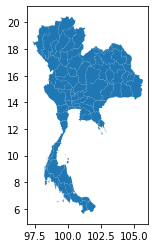

In [193]:
# การคิวรีข้อมูลและแสดงผลในรูปแบบแผนที่พร้อมพล็อตละติจูดลองจิจูด
sql = 'SELECT * FROM Tha_adm1'
gpd_covid = gpd.read_postgis(sql, con=engine)
gpd_covid.plot()
plt.show()

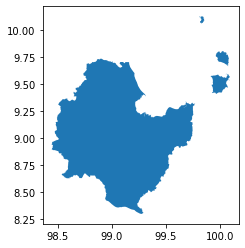

In [217]:
# การคิวรีข้อมูลและแสดงผลในรูปแบบแผนที่พร้อมพล็อตละติจูดลองจิจูดตามเงื่อนไขที่กำหนด
sql = "SELECT * FROM Tha_adm1 WHERE NAME_1='Surat Thani'"
gpd_covid = gpd.read_postgis(sql, con=engine)
gpd_covid.plot()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

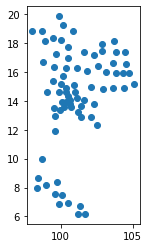

In [219]:
# การคิวรีข้อมูลประเภทจุดและแสดงผลในรูปแบบแผนที่
sql ='SELECT province, cases, geom FROM covid'
test = gpd.read_postgis(sql, con=engine)
test.plot()
plt.show 


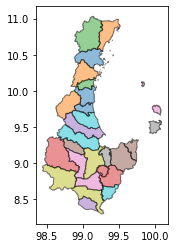

In [259]:
# การใช้ฟังก์ชัน Intersection เพื่อรวมข้อมูลเฉพาะส่วนที่ซ้ำกันใน 2 ตารางหรือชั้นข้อมูล
sql = 'SELECT * FROM Tha_adm2'
test = gpd.read_postgis(sql, con=engine)
sql2 = 'SELECT * FROM chumphon_surat'
test2 = gpd.read_postgis(sql2, con=engine)

country1 = gpd.overlay(test, test2, how='intersection')
country1.plot(alpha=0.5, edgecolor='k', cmap='tab10');

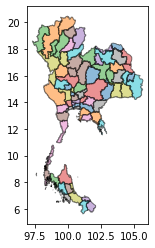

In [256]:
# การใช้ฟังก์ชัน Difference เพื่อลบข้อมูลส่วนที่ไม่ต้องการ
sql = 'SELECT * FROM Tha_adm1'
test = gpd.read_postgis(sql, con=engine)
sql2 = 'SELECT * FROM chumphon_surat'
test2 = gpd.read_postgis(sql2, con=engine)

country2 = gpd.overlay(test, test2, how='difference')
country2.plot(alpha=0.5, edgecolor='k', cmap='tab10');

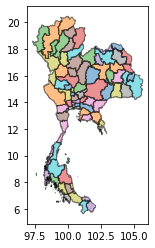

In [260]:
# การใช้ฟังก์ชัน Union เพื่อรวมข้อมูลทั้งหมดทั้งซ้ำและไม่ซ้ำ
country3 = gpd.overlay(country2, test2, how='union')
country3.plot(alpha=0.5, edgecolor='k', cmap='tab10');

In [194]:

from sqlalchemy import create_engine
import geopandas as gpd
import matplotlib.pyplot as plt
sql = 'SELECT * FROM Tha_adm1'
gpd_covid = gpd.read_postgis(sql, con=engine)
gpd_covid

,gid,id_0,iso,name_0,id_1,name_1,type_1,engtype_1,nl_name_1,varname_1,geom
0,1,228.0,THA,Thailand,1.0,Amnat Charoen,Changwat,Province,จังหวัดอำนาจเจริ,None,"MULTIPOLYGON (((104.97262 16.27536, 104.97290 ..."
1,2,228.0,THA,Thailand,2.0,Ang Thong,Changwat,Province,จังหวัดอ่างทอง,None,"MULTIPOLYGON (((100.34077 14.78768, 100.34173 ..."
2,3,228.0,THA,Thailand,3.0,Bangkok Metropolis,Changwat,Province,จังหวัดเชียงใหม่,Bangkok|Krung Thep|Krung Thep Maha Nakhon|Phra...,"MULTIPOLYGON (((100.62670 13.94395, 100.62648 ..."
3,4,228.0,THA,Thailand,4.0,Bueng Kan,Changwat,Province,บึงกาฬ,None,"MULTIPOLYGON (((103.41059 18.44627, 103.41159 ..."
4,5,228.0,THA,Thailand,5.0,Buri Ram,Changwat,Province,จังหวัดบุรีรัมย์,Buri Rum,"MULTIPOLYGON (((102.93896 15.78453, 102.93933 ..."
5,6,228.0,THA,Thailand,6.0,Chachoengsao,Changwat,Province,จังหวัดฉะเชิงเทร,Chaxerngsao|Pad Rew|Paed Riu|Petrieu|Shajeun D...,"MULTIPOLYGON (((101.04707 13.97561, 101.04822 ..."
6,7,228.0,THA,Thailand,7.0,Chai Nat,Changwat,Province,จังหวัดชัยนาท,Chainat,"MULTIPOLYGON (((100.11601 15.41157, 100.11974 ..."
7,8,228.0,THA,Thailand,8.0,Chaiyaphum,Changwat,Province,จังหวัดชัยนาท,None,"MULTIPOLYGON (((101.57202 16.72447, 101.57427 ..."
8,9,228.0,THA,Thailand,9.0,Chanthaburi,Changwat,Province,จันทบุรี,Chantaburi|Muang Chan,"MULTIPOLYGON (((102.25305 12.28667, 102.25166 ..."
9,10,228.0,THA,Thailand,10.0,Chiang Mai,Changwat,Province,จังหวัดเชียงใหม่,None,"MULTIPOLYGON (((99.52040 20.13689, 99.52489 20..."


In [191]:
import pandas as pd
import numpy as np
import math

import geopandas as gpd
import json

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
from bokeh.palettes import brewer, d3

from bokeh.io.doc import curdoc
from bokeh.models import Slider, HoverTool, Select
from bokeh.layouts import widgetbox, row, column

def plotMap():
    #Read data to json
    merged_json = json.loads(gpd_covid.to_json())

    #Convert to str like object
    json_data = json.dumps(merged_json)
    geosource = GeoJSONDataSource(geojson = json_data)

    #Define a sequential multi-hue color palette.
    palette = brewer['RdYlGn'][8]
    #Reverse color order so that dark blue is highest obesity.
    #palette = palette[::-1]
    #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
    color_mapper = LinearColorMapper(palette = palette, low = gpd_covid['id_1'].min(), high = gpd_covid['id_1'].max(), nan_color = '#d9d9d9')
    #Define custom tick labels for color bar.
    tick_labels = {'100': '>100'}

    #Add hover tool
    hover = HoverTool(tooltips = [ ('จังหวัด','@name_1'),('จำนวนผู้ป่วย','@id_1')])
    #Create color bar. 
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
    #Create figure object.
    p = figure(title = 'จำนวนผู้ป่วยโควิด 19', plot_height = 750 , plot_width = 600, toolbar_location = None, tools = [hover])

    p.xaxis.visible = False
    p.yaxis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    #Add patch renderer to figure. 
    p.patches('xs','ys', source = geosource,fill_color = {'field' :'id_1', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 0.8)
    #Specify layout
    p.add_layout(color_bar, 'below')

#Display plot
    show(p)
    return(p)

In [192]:
plotMap()

Figure(id='1730', ...)

In [136]:
# Create a list of year values
province = list(df['province'].unique())
province_ = []
# Preview years list
province

['Samut Sakhon',
 'Bangkok Metropolis',
 'Chon Buri',
 'Samut Prakan',
 'Rayong',
 'Nonthaburi',
 'Phuket',
 'Songkhla',
 'Yala',
 'Chanthaburi',
 'Pattani',
 'Chiang Rai',
 'Pathum Thani',
 'Nakhon Pathom',
 'Chiang Mai',
 'Narathiwat',
 'Chachoengsao',
 'Tak',
 'Krabi',
 'Nakhon Ratchasima',
 'Ang Thong',
 'Phetchaburi',
 'Ratchaburi',
 'Trat',
 'Satun',
 'Prachuap Khiri Khan',
 'Ubon Ratchathani',
 'Samut Songkhram',
 'Saraburi',
 'Nakhon Si Thammarat',
 'Buriram',
 'Phatthalung',
 'Phra Nakhon Si Ayutthaya',
 'Sa Kaeo',
 'Udon Thani',
 'Nakhon Sawan',
 'Surin',
 'Kanchanaburi',
 'Prachin Buri',
 'Chaiyaphum',
 'Khon Kaen',
 'Phichit',
 'Chai Nat',
 'Sisaket',
 'Suphan Buri',
 'Trang',
 'Lampang',
 'Uttaradit',
 'Loei',
 'Phitsanulok',
 'Mae Hong Son',
 'Lamphun',
 'Nakhon Nayok',
 'Phayao',
 'Nong Khai',
 'Sukhothai',
 'Nong Bua Lamphu',
 'Mukdahan',
 'Phetchabun',
 'Amnat Charoen',
 'Kalasin',
 'Roi Et',
 'Lop Buri',
 'Nakhon Phanom',
 'Kamphaeng Phet',
 'Maha Sarakham',
 'Phangng

In [139]:
# Create a list of covid cases
cases = list(df['cases'])
cases_ = []
# Preview 
cases

[2871,
 2431,
 913,
 379,
 342,
 280,
 231,
 136,
 135,
 125,
 94,
 79,
 71,
 66,
 49,
 44,
 40,
 30,
 27,
 26,
 25,
 25,
 23,
 23,
 20,
 18,
 17,
 17,
 16,
 15,
 14,
 14,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 10,
 9,
 8,
 8,
 8,
 8,
 8,
 7,
 6,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 10]

In [140]:
covid_freq = pd.DataFrame({'Province':province, 'Cases':cases})
# Preview earthquake freq dataframe
covid_freq.head()

,Province,Cases
0,Samut Sakhon,2871
1,Bangkok Metropolis,2431
2,Chon Buri,913
3,Samut Prakan,379
4,Rayong,342


In [145]:
# Create a ColumnDataSource and a list of year and count values
source_freq = ColumnDataSource(covid_freq)
# Create lists from source_freq ColumnDataSource
province_list = source_freq.data['Province'].tolist()
cases_list = source_freq.data['Cases'].tolist()

print(source_freq)

ColumnDataSource(id='1587', ...)


In [146]:
# Define the style of our plot using a custom style function
def style2(p): # Takes in a plot
    # Title
    p.title.align = 'center'
    p.title.text_font_size = '20pt'
    p.title.text_font = 'serif'

    # Axis titles
    p.xaxis.axis_label_text_font_size = '14pt'
    p.xaxis.axis_label_text_font_style = 'bold'
    p.yaxis.axis_label_text_font_size = '14pt'
    p.yaxis.axis_label_text_font_style = 'bold'

    # Tick labels
    p.xaxis.major_label_text_font_size = '12pt'
    p.yaxis.major_label_text_font_size = '12pt'
    
    # Plot the legend in the top right corner
    p.legend.location = 'top_right'

    return p

In [150]:
from bokeh.tile_providers import get_provider, Vendors
from bokeh.models.tiles import WMTSTileSource
import math
from math import pi
from bokeh.palettes import Category20c
from bokeh.transform import cumsum
from bokeh.tile_providers import CARTODBPOSITRON, STAMEN_TERRAIN 
from bokeh.themes import built_in_themes
from bokeh.io import curdoc
from bokeh.models import WMTSTileSource

# Create Geo Map Plot
def plotMap():
    # Show the plot embedded in jupyter notebook
    #output_notebook()
    
    lat = df['latitude'].values.tolist()
    lon = df['longitude'].values.tolist()
    
    lst_lat = []
    lst_lon = []
    i = 0
    
    
    # Convert lat and long values inot merc_projection
    for i in range(len(lon)):
    
        r_major = 6378137.000
        x = r_major * math.radians(lon[i])
        scale = x/lon[i]
        y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 +
            lat[i] * (math.pi/180.0)/2.0)) * scale
        
        lst_lon.append(x)
        lst_lat.append(y)
        i += 1
    
    df['coords_x'] = lst_lat
    df['coords_y'] = lst_lon
     
    
    lats = df['coords_x'].tolist()
    longs = df['coords_y'].tolist()
    mags = df['cases'].tolist()
    pros = df['province'].tolist()
    # Create datasource
    cds = ColumnDataSource(data=dict(
        lat=lats,
        lon=longs,
        mag=cases_list,
        pro=pros
    ))
    
    # Tooltip
    TOOLTIPS = [
        ("จังหวัด", " @pro"),
        ("จำนวนผู้ป่วยโควิด19", " @mag")
        
    ]
    
    # Create figure
    p = figure(title='Covid Map',
              plot_width=1000,
              plot_height=600,
              x_range=(9000000, 14000000),
              y_range=(1000000, 1400000),
              tooltips=TOOLTIPS)
    p.add_tile(get_provider(Vendors.CARTODBPOSITRON))
   
    p.circle(x='lon', y='lat', fill_color='red', fill_alpha=0.8, source=cds, legend='cases')
    
    
    
    # Style the map plot
    # Title
    p.title.align = 'center'
    p.title.text_font_size = '30pt'
    p.title.text_font = 'serif'
    
    # Legend
    p.legend.location = 'bottom_right'
    p.legend.background_fill_color='black'
    p.legend.background_fill_alpha = 0.8
    p.legend.click_policy = 'hide'
    p.legend.label_text_color = 'white'
    p.xaxis.visible=False
    p.yaxis.visible=False
    p.axis.axis_label=None
    p.axis.visible=False
    p.grid.grid_line_color=None
    
    show(p) 
    
    return p
    
plotMap()

Figure(id='1589', ...)